In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train=pd.read_csv('/content/gdrive/MyDrive/train.csv')
test=pd.read_csv('/content/gdrive/MyDrive/test.csv')
ans = pd.read_csv('/content/gdrive/MyDrive/sample_submission.csv')


In [4]:
train.describe()

,Internal_rating,Success_probability
count,7007.000000,7007.000000
mean,3.009562,64.745133
std,1.418666,17.931635
min,1.000000,-5.000000
25%,2.000000,60.600000
50%,3.000000,65.300000
75%,4.000000,69.600000
max,5.000000,107.340000


In [5]:
train.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506$,2067263.7$,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,...,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3,73.6
1,TitleKIW18,Bender PLC LLC,Construction Services,39488$,240876.8$,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,...,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392$,2407926.4$,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,...,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4,68.8
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774$,468321.4$,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,...,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.5
4,Title904GV,Lee and Sons PLC,Financial Services,483896$,NaN,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,...,Executive Vice President,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.4


In [28]:
train2=test.drop(['Date_of_creation','Contact_no','POC_name','Lead_POC_email','Internal_POC','Deal_title','Lead_name'],axis=1)
#train2.head()

test2=test.drop(['Date_of_creation','Contact_no','POC_name','Lead_POC_email','Internal_POC','Deal_title','Lead_name'],axis=1)
test2.head()

,Industry,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Geography,Location,Designation,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Resource,Internal_rating
0,Investment Bank/Brokerage,200988$,NaN,Product_1,100 - 500 Million,Category 4,India,Bhubaneshwar,Chairman/CEO/President,"Designer, fashion/clothing",Marketing Event,Level 1,more than a month,No,-1.0
1,Electronics,409961$,2541758.2$,Product_1,100 - 500 Million,Category 3,USA,"Coeur d'Alene, ID",CEO/Co-Founder/Chairman,Horticultural consultant,Marketing Event,Level 2,Up-to-date,Yes,1.0
2,Banks,434433$,3041031.0$,Product_1,100 - 500 Million,Category 1,USA,"Portland-South Portland, ME",Chairman/Chief Innovation Officer,Information officer,Marketing Event,Level 2,Did not hear back after Level 1,Deliverable,5.0
3,Music,218952$,1521716.4$,Product_2,100 - 500 Million,Category 1,India,Bareilly,CEO/Chairman/President,Commercial/residential surveyor,Contact Email,Level 3,more than a month,No,5.0
4,Real Estate,392835$,2455218.75$,Product_1,500 Million - 1 Billion,Category 3,USA,"Trenton, NJ",CEO/Co-Founder/Chairman,Wellsite geologist,Others,Level 3,More than 2 weeks,Deliverable,2.0


In [7]:
train2.isnull().sum()

Industry                   1
Deal_value                51
Weighted_amount          525
Pitch                      0
Lead_revenue               0
Fund_category              0
Geography                972
Location                  11
Designation                0
Hiring_candidate_role      0
Lead_source                0
Level_of_meeting           0
Last_lead_update         633
Resource                 149
Internal_rating            0
Success_probability        0
dtype: int64

In [29]:
train2 = train2.dropna(how='any', subset=['Industry','Resource','Deal_value','Location'], axis=0)
test2 = test2.dropna(how='any', subset=['Industry','Resource','Deal_value','Location'], axis=0)


In [31]:
train2['Designation'].value_counts()
#print(train2['Designation'].value_counts())
train2['Designation'] = train2['Designation'].replace({'Chairman/CEO/President':'Chairman/CEO/President',
                                              'CEO/Chairman/President':'Chairman/CEO/President',
                                              'Chief Executive Officer':'CEO',
                                              'Vice President / GM (04-present) : VP Sales and Marketing (01-04)':'Vice President/GM'})

test2['Designation'].value_counts()
print(test2['Designation'].value_counts())
test2['Designation'] = test2['Designation'].replace({'Chairman/CEO/President':'Chairman/CEO/President',
                                              'CEO/Chairman/President':'Chairman/CEO/President',
                                              'Chief Executive Officer':'CEO',
                                              'Vice President / GM (04-present) : VP Sales and Marketing (01-04)':'Vice President/GM'})

Chairman/CEO/President               435
CEO                                  396
CEO/Co-Founder/Chairman              228
SVP/General Counsel                  224
Vice President/GM                    217
Chairman/Chief Innovation Officer    194
CEO/President                        190
Executive Vice President             186
Name: Designation, dtype: int64


In [10]:
train2['Last_lead_update'].replace('?','No track',inplace=True)
train2['Last_lead_update'].replace(np.nan,'No track',inplace=True)


In [11]:
train2['Geography'] = train2.apply(lambda row: 'USA' if pd.isna(row['Geography']) and ',' in row['Location'] else ('India' if pd.isna(row['Geography']) else row['Geography']),axis=1)


In [12]:
train2['Deal_value'] = train2['Deal_value'].str.replace('$', '')
train2['Weighted_amount'] = train2['Weighted_amount'].str.replace('$', '')
train2['Weighted_amount'] = train2['Weighted_amount'].astype(float)
train2['Deal_value'] = train2['Deal_value'].astype(float)
train2['Weighted_amount'].fillna(train2['Weighted_amount'].mean(),inplace=True)

<ipython-input-12-00a82e0973fb>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train2['Deal_value'] = train2['Deal_value'].str.replace('$', '')
<ipython-input-12-00a82e0973fb>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train2['Weighted_amount'] = train2['Weighted_amount'].str.replace('$', '')


In [13]:
train2.shape

(6797, 16)

In [14]:
train2.isnull().sum()

Industry                 0
Deal_value               0
Weighted_amount          0
Pitch                    0
Lead_revenue             0
Fund_category            0
Geography                0
Location                 0
Designation              0
Hiring_candidate_role    0
Lead_source              0
Level_of_meeting         0
Last_lead_update         0
Resource                 0
Internal_rating          0
Success_probability      0
dtype: int64

In [15]:
l=['Industry','Pitch','Lead_revenue','Fund_category','Geography','Designation','Hiring_candidate_role','Lead_source','Last_lead_update','Resource','Level_of_meeting','Internal_rating']
for i in l:
    train2[i]=LabelEncoder().fit_transform(train2[i])
train2.drop('Location',axis=1,inplace=True)
train2.head(15)


,Industry,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Geography,Designation,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Resource,Internal_rating,Success_probability
1,31,39488.0,2.408768e+05,1,2,3,0,3,501,2,0,2,2,4,58.90
2,56,359392.0,2.407926e+06,0,2,3,1,6,286,1,0,6,2,3,68.80
3,114,76774.0,4.683214e+05,1,2,2,1,1,611,0,1,2,4,0,64.50
4,46,483896.0,1.572916e+06,1,1,2,0,5,369,3,1,8,2,3,62.40
5,17,418674.0,2.637646e+06,0,1,1,0,1,381,1,2,0,1,2,66.30
7,9,245205.0,1.642874e+06,1,2,0,1,7,212,2,1,1,2,4,74.10
8,37,343280.0,1.991024e+06,0,0,2,1,4,458,0,0,6,4,1,61.40
9,111,293611.0,1.791027e+06,0,2,2,1,0,223,0,0,9,1,3,66.00
10,54,311125.0,1.851194e+06,0,2,1,1,1,305,3,0,3,0,1,67.90
11,57,7819.0,4.574115e+04,0,1,0,1,3,526,2,1,8,3,0,63.90


In [16]:
train2.sort_values(by='Weighted_amount',axis=0)

,Industry,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Geography,Designation,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Resource,Internal_rating,Success_probability
725,66,1555.0,8708.00,0,2,1,1,3,75,2,1,2,0,1,64.30
6109,133,1551.0,9306.00,1,2,1,0,1,48,1,0,8,4,4,62.90
6871,130,1589.0,9375.10,0,2,0,0,2,634,2,1,4,1,1,58.80
4263,46,1670.0,9686.00,1,1,2,1,0,573,3,0,1,5,3,107.34
1124,38,1767.0,9983.55,1,1,2,0,0,224,0,1,3,3,3,55.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,17,497604.0,3508108.20,0,2,3,0,6,439,0,2,6,1,4,65.00
2078,60,476174.0,3523687.60,1,2,0,1,2,572,3,2,5,3,4,79.10
3458,6,496144.0,3597044.00,0,2,0,1,0,512,0,2,6,3,4,75.50
998,140,492886.0,3598067.80,0,0,0,1,0,322,3,2,2,3,4,77.70


In [25]:
# Select only the numerical columns
numerical_columns = ['Deal_value','Weighted_amount']

# Function to remove outliers based on a threshold
def remove_outliers(df, columns, threshold=2):
    df_no_outliers = df.copy()
    for column in columns:
        mean = df[column].mean()
        std = df[column].std()
        lower_bound = mean - (threshold * std)
        upper_bound = mean + (threshold * std)
        df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]
    return df_no_outliers

# Remove outliers from numerical columns
train2 = remove_outliers(train2, numerical_columns)
print(train2.shape)
print(train2.describe())
print(train2[["Success_probability"]].median())

(6743, 15)
          Industry     Deal_value  Weighted_amount        Pitch  Lead_revenue  \
count  6743.000000    6743.000000     6.743000e+03  6743.000000   6743.000000   
mean     62.576746  248157.581492     1.558276e+06     0.499036      1.004746   
std      42.791760  143757.277462     8.750631e+05     0.500036      0.821313   
min       0.000000    1551.000000     8.708000e+03     0.000000      0.000000   
25%      17.000000  121816.500000     8.205023e+05     0.000000      0.000000   
50%      56.000000  245460.000000     1.572916e+06     0.000000      1.000000   
75%      94.000000  373981.500000     2.277995e+06     1.000000      2.000000   
max     170.000000  500000.000000     3.306954e+06     1.000000      2.000000   

       Fund_category    Geography  Designation  Hiring_candidate_role  \
count    6743.000000  6743.000000  6743.000000            6743.000000   
mean        1.489100     0.502744     3.087202             316.991992   
std         1.106529     0.500030     2.

In [26]:
#train2.sort_values(by='Weighted_amount',axis=0,ascending=False)
print(train2.head(20))

    Industry  Deal_value  Weighted_amount  Pitch  Lead_revenue  Fund_category  \
1         31     39488.0     2.408768e+05      1             2              3   
2         56    359392.0     2.407926e+06      0             2              3   
3        114     76774.0     4.683214e+05      1             2              2   
4         46    483896.0     1.572916e+06      1             1              2   
5         17    418674.0     2.637646e+06      0             1              1   
7          9    245205.0     1.642874e+06      1             2              0   
8         37    343280.0     1.991024e+06      0             0              2   
9        111    293611.0     1.791027e+06      0             2              2   
10        54    311125.0     1.851194e+06      0             2              1   
11        57      7819.0     4.574115e+04      0             1              0   
12        21    222331.0     1.400685e+06      1             0              1   
13        17    487351.0    

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Load your dataset (replace 'your_dataset.csv' with the actual file path)

# Separate features (X) and target (y)
X = train2[['Deal_value',	'Weighted_amount'	,	'Lead_revenue',	'Fund_category',	'Lead_source',	'Level_of_meeting',	'Last_lead_update',	'Resource',	'Internal_rating']]
#print(X)
y = train2['Success_probability']
# print(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a Random Forest Regressor
n_estimators = 200  # Number of trees in the forest
max_depth = None  # Maximum depth of the individual trees
rf_regressor = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

# Train the Random Forest Regressor
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)
print(y_pred)
print(y_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")


[65.2171  65.0869  66.47765 ... 63.5218  59.5259  67.4452 ]
1650     69.70
3789     69.00
1936     67.50
2396     69.40
502      71.00
         ...  
1111     62.60
3871    107.34
6344     68.60
6628     59.70
2831     68.50
Name: Success_probability, Length: 1360, dtype: float64
Mean Squared Error: 335.52
R-squared: -0.04


In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Separate features (X) and target (y)
X = train2[['Deal_value',	'Weighted_amount'	,	'Lead_revenue',	'Fund_category',	'Lead_source',	'Level_of_meeting',	'Last_lead_update',	'Resource',	'Internal_rating']]
#print(X)
y = train2['Success_probability']
# print(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a Gradient Boosting Regressor model
n_estimators = 100  # Number of boosting stages (trees)
learning_rate = 0.1  # Step size shrinkage to prevent overfitting
gb_regressor = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate)

# Train the model
gb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_regressor.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 331.06
R-squared: 0.02


In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separate features (X) and target (y)
X = train2[['Deal_value',	'Weighted_amount'	,	'Lead_revenue',	'Fund_category',	'Lead_source',	'Level_of_meeting',	'Last_lead_update',	'Resource',	'Internal_rating']]
#print(X)
y = train2['Success_probability']
# print(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform features to polynomial features
degree = 4  # Degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a Linear Regression model
poly_regressor = LinearRegression()

# Train the model
poly_regressor.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = poly_regressor.predict(X_test_poly)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 314.61
R-squared: -0.01


(array([359., 399., 340., 381., 372., 354., 350., 382., 845., 375., 351.,
        348., 337., 330., 380., 346., 286., 173.,  76.,  13.]),
 array([   8708.    ,  188343.3875,  367978.775 ,  547614.1625,
         727249.55  ,  906884.9375, 1086520.325 , 1266155.7125,
        1445791.1   , 1625426.4875, 1805061.875 , 1984697.2625,
        2164332.65  , 2343968.0375, 2523603.425 , 2703238.8125,
        2882874.2   , 3062509.5875, 3242144.975 , 3421780.3625,
        3601415.75  ]),
 <BarContainer object of 20 artists>)

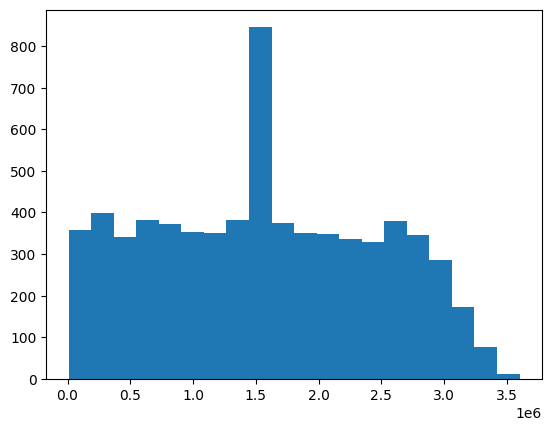

In [22]:
import matplotlib.pyplot as plt
x1=train2[['Weighted_amount']]
y1=train2[['Success_probability']]
plt.hist(x1,bins=20)